In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
df = pd.read_csv('address_data_combined.csv')
df.head()

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Unique Received From Addresses,min value received,max value received,avg val received,min val sent,avg val sent,total transactions (including tnx to create contract,total ether received,total ether balance
0,0x87d884aaa6ff9e9b6014631b0abae80b53953fb8,1,5151.68,15159.08,71235.62,1,0.010000,0.020000,0.013367,0.000000,0.000000,8,0.040100,0.040100
1,0xd42393df90d582bd8a5493171f0173e3a017d391,1,1179.02,1124.89,25126.45,13,0.000000,0.750000,0.176667,0.145000,0.419270,22,2.650000,-0.284889
2,0x3025c36d8a9620d3df89e9e9b1acbdfd639a6f37,1,361.73,0.00,723.47,1,4.999916,4.999916,4.999916,2.490000,2.499538,3,4.999916,0.000840
3,0x6309f709faad518fc158af4c14edfa7b06424770,1,0.00,0.00,0.00,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000
4,0x3d020954e30c3d40b7f0c533cf198bc10dd45a49,1,14280.60,1479.86,45357.57,21,0.035000,0.200000,0.099286,2.084658,2.084658,22,2.085000,0.000342


In [ ]:
X = df.drop(columns=['Address','FLAG'])
y = df['FLAG']
print(X.shape)
print(y.shape)

(14155, 12)
(14155,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.3,stratify=y)

print(X_train.shape)
print(X_test.shape)

(9908, 12)
(4247, 12)


In [ ]:
import numpy as np

columns = ['Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)',
       'Unique Received From Addresses', 'min value received',
       'max value received ', 'avg val received', 'min val sent',
       'avg val sent', 'total transactions (including tnx to create contract',
       'total ether received', 'total ether balance']

scaler = MinMaxScaler()

# Log for Skewed Data
for c in columns:
  X_train[c] = X_train[c].apply(lambda x: np.log(x) if x > 0 else 0)
  X_test[c] = X_test[c].apply(lambda x: np.log(x) if x > 0 else 0)

# Scaling
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

np.isnan(X_train)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
tuned_parameters = [
    { "gamma": [1,0.1,0.01,0.001], "C": [1, 10, 100, 1000]},
]

grid = GridSearchCV(SVC(kernel='linear'),tuned_parameters, refit=True,verbose=2,cv=5, scoring='f1')
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .......................................C=1, gamma=1; total time=   1.9s
[CV] END .......................................C=1, gamma=1; total time=   1.5s
[CV] END .......................................C=1, gamma=1; total time=   1.6s
[CV] END .......................................C=1, gamma=1; total time=   1.5s
[CV] END .......................................C=1, gamma=1; total time=   1.6s
[CV] END .....................................C=1, gamma=0.1; total time=   1.6s
[CV] END .....................................C=1, gamma=0.1; total time=   1.8s
[CV] END .....................................C=1, gamma=0.1; total time=   2.3s
[CV] END .....................................C=1, gamma=0.1; total time=   1.5s
[CV] END .....................................C=1, gamma=0.1; total time=   1.6s
[CV] END ....................................C=1, gamma=0.01; total time=   1.6s
[CV] END ....................................C=1

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001]}],
             scoring='f1', verbose=2)

In [ ]:
GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001]}],
             scoring='f1', verbose=2)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001]}],
             scoring='f1', verbose=2)

In [ ]:
grid.best_params_

{'C': 1000, 'gamma': 1}

In [ ]:
grid.best_score_

0.8464033748174989

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Assuming 'grid' is your trained SVM model
predicted_y = grid.predict(X_test)

accuracy = accuracy_score(y_test, predicted_y)
recall = recall_score(y_test, predicted_y)
precision = precision_score(y_test, predicted_y)
roc_auc = roc_auc_score(y_test, predicted_y)
print("Accuracy Score:", accuracy)
print("Recall Score:", recall)
print("Precision Score:", precision)
print("ROC-AUC Score:", roc_auc)


Accuracy Score: 0.8610784082882035
Recall Score: 0.8440695296523517
Precision Score: 0.8527892561983471
ROC-AUC Score: 0.859834852124299


In [ ]:
print("Tuned Hyperparameters :", grid.best_params_)
print("Train F1 Score :",grid.best_score_)
best_y_pr = grid.predict(X_test)
print('Test F1 Score: ', f1_score(y_test, best_y_pr))

Tuned Hyperparameters : {'C': 1000, 'gamma': 1}
Train F1 Score : 0.8464033748174989
Test F1 Score:  0.8484069886947584


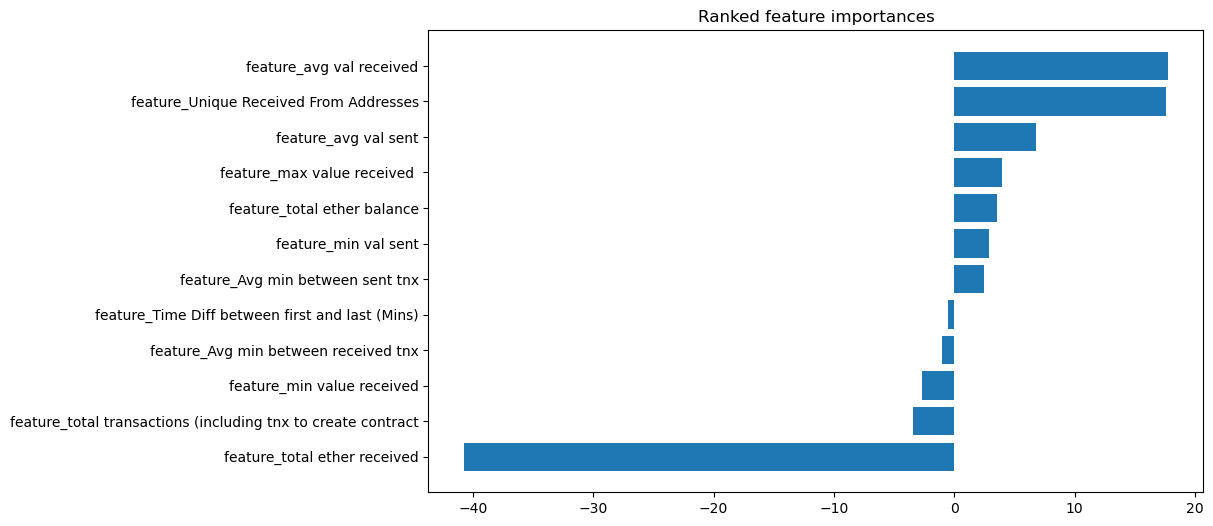

In [ ]:
from matplotlib import pyplot as plt
feat_importances = grid.best_estimator_.coef_[0]
indices = np.argsort(feat_importances)
# plot
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Ranked feature importances")
plt.barh(range(len(feat_importances)), feat_importances[indices], align="center")
features = ['feature_{}'.format(columns[i]) for i in range(len(columns))]
plt.yticks(range(len(feat_importances)), [features[idx] for idx in indices])
plt.ylim([-1, len(feat_importances)])
plt.show();